In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from utils import ugv_utils as ugvu
from visualization import papermode

papermode(plt, size=18)


In [2]:
abbrs = ("P07", "P09", "P05", "P10", "P08", "P06")
for abbr in abbrs:
    preprocess(abbr, verbose=False)

dfs = tuple(ugvu.read_df_rename_columns(abbr) for abbr in abbrs)

big_df = ugvu.append_dfs(dfs)
big_df.head()


time  time_rel        vx   vy   vz        wz    current    voltage  \
0  1.662066e+09  0.000000  0.156661  0.0  0.0  0.001741  10.704132  51.077042   
1  1.662066e+09  0.736199  0.156661  0.0  0.0  0.001741  13.355804  50.902481   
2  1.662066e+09  1.730371  0.387005  0.0  0.0 -0.001693  12.437225  50.891323   
3  1.662066e+09  2.739310  0.386142  0.0  0.0  0.000385  16.324463  50.697880   
4  1.662066e+09  3.745184  0.560030  0.0  0.0 -0.010845  14.574158  50.713459   

   current_cpu        ax  ...         py        pz      I_L      I_R  \
0     1.073650  0.267378  ... -37.089817  0.643902  2.78125  3.65625   
1     1.047633  0.267378  ... -37.089817  0.643902  2.78125  3.65625   
2     1.035684  0.229742  ... -37.076732  0.653263  2.18750  1.75000   
3     1.052063  0.902445  ... -37.062641  0.672032  4.81250  3.37500   
4     1.050868  0.354530  ... -37.044533  0.701757  2.81250  2.68750   

        V_L       V_R   ax_corr   ay_corr   az_corr  terrain  
0  50.15625  50.46875  0.149731  0.005265  0.012960  asphalt  
1  50.15625  50.46875  0.149731  0.005265  0.012960  asphalt  
2  50.12500  50.43750 -0.117113 -0.009350  0.026655  asphalt  
3  49.93750  50.25000  0.245005  0.000839 -0.070893  asphalt  
4  49.93750  50.31250 -0.071469  0.035854 -0.001672  asphalt  

[5 rows x 34 columns]

In [3]:
m2009_df = big_df.copy()
m2009_df.meta = big_df.meta
p2014_df = big_df.copy()
p2014_df.meta = big_df.meta
p2022_df = big_df.copy()
p2022_df.meta = big_df.meta

In [4]:
m2009_df = morales2009.morales2009(abbr=m2009_df.meta.abbr, df=m2009_df, verbose=False, compute_errors=False)
p2014_df = pentzer2014pow.pentzer2014pow(abbr=p2014_df.meta.abbr, df=p2014_df, verbose=False, compute_errors=False)
p2022_df = pentzer2022.pentzer2022(abbr=p2022_df.meta.abbr, df=p2022_df, verbose=False, compute_errors=False, detect_terrains=True)

P07P09P05P10P08P06: 100%|██████████| 145/145 [00:00<00:00, 3414.77it/s]


# Downhill

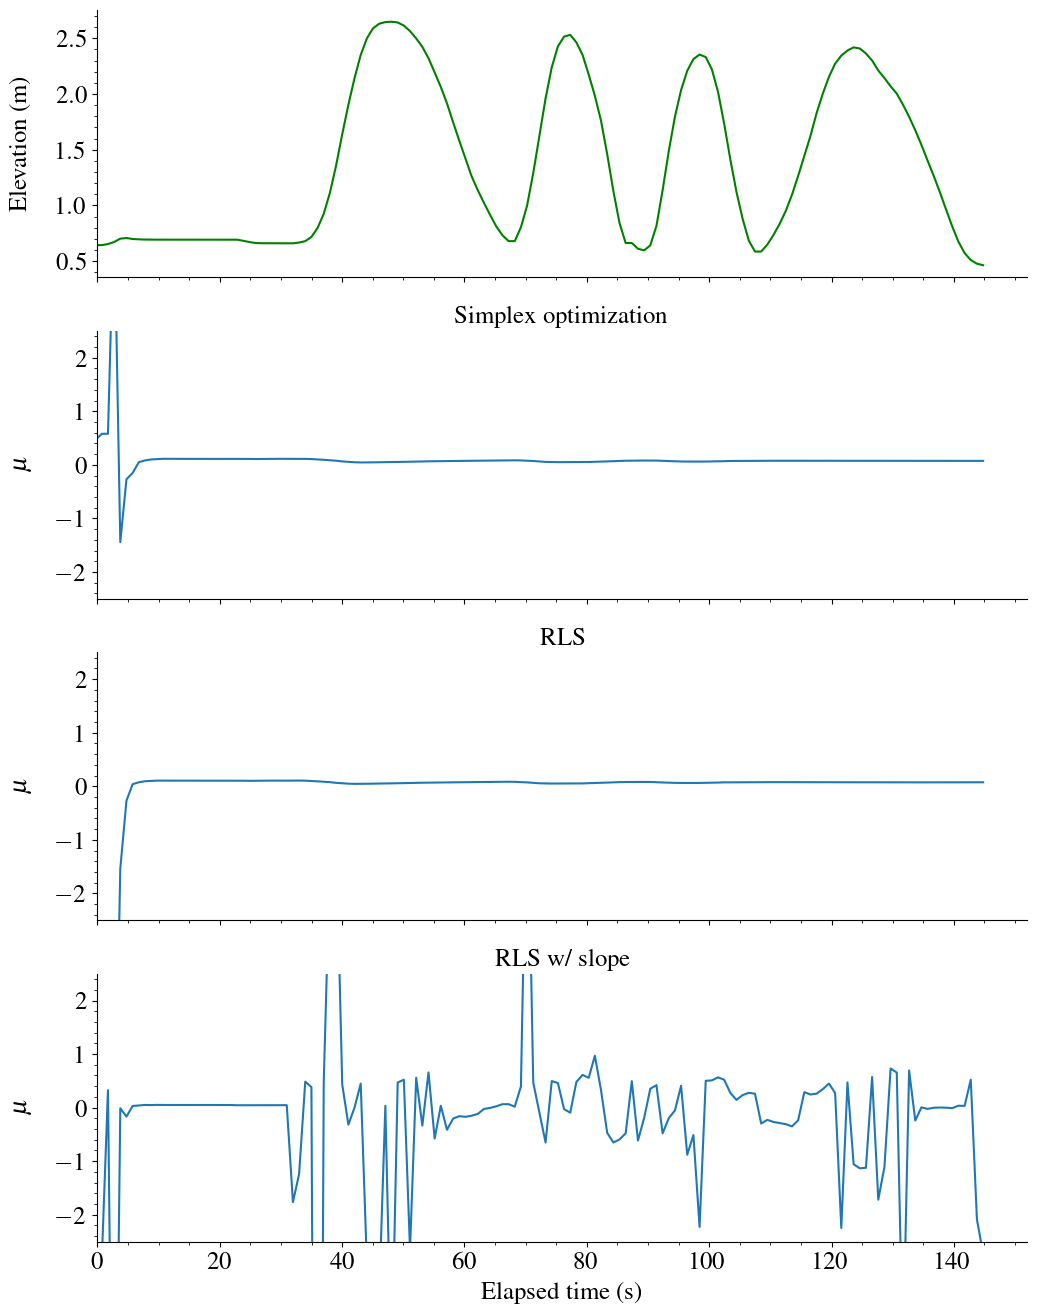

In [5]:
fig, axs = plt.subplots(figsize=(12, 16), nrows=4, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(m2009_df.time_rel, m2009_df.m_sym)
axs[1].set_ylabel("$\mu$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
axs[1].set_ylim(bottom=-2.5, top=2.5)
axs[1].set_title("Simplex optimization")

axs[2].plot(p2014_df.time_rel, p2014_df.m_sym)
axs[2].set_ylabel("$\mu$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
axs[2].set_ylim(bottom=-2.5, top=2.5)
axs[2].set_title("RLS")

axs[3].plot(p2022_df.time_rel, p2022_df.m_sym)
axs[3].set_ylabel("$\mu$")
axs[3].yaxis.set_label_coords(-0.07, 0.5)
axs[3].set_ylim(bottom=-2.5, top=2.5)
axs[3].set_title("RLS w/ slope")

axs[3].set_xlabel("Elapsed time (s)")
axs[3].xaxis.set_label_coords(0.5, -0.15)
axs[3].set_xlim(left=0)

for ax in axs:
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

# for ext in u.EXTS:
#     fig.savefig(figdir / f"warthog-hill.{ext}", bbox_inches="tight")


In [6]:
m2009_df["Pest"] = m2009_df.m_sym * m2009_df.JS_sym + m2009_df.G_sym * m2009_df.JG
m2009_df["Perr"] = m2009_df.P_motion - m2009_df.Pest

p2014_df["Pest"] = p2014_df.m_sym * p2014_df.JS_sym + p2014_df.G_sym * p2014_df.JG
p2014_df["Perr"] = p2014_df.P_motion - p2014_df.Pest

p2022_df["Pest"] = p2022_df.m_sym * p2022_df.JS_sym + p2022_df.G_sym * p2022_df.JG
p2022_df["Perr"] = p2022_df.P_motion - p2022_df.Pest

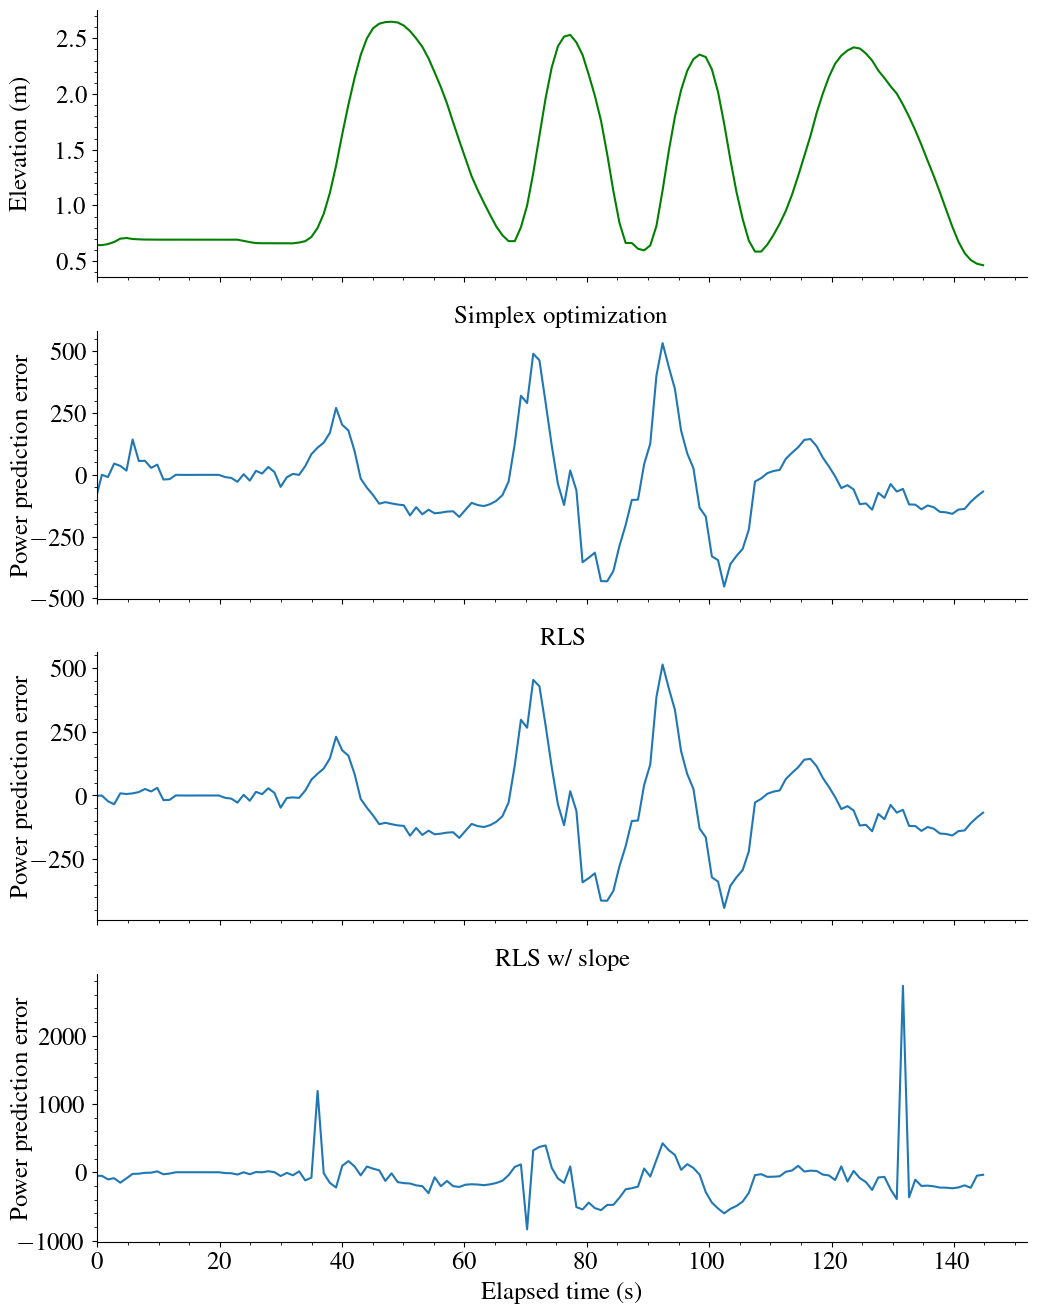

In [7]:
fig, axs = plt.subplots(figsize=(12, 16), nrows=4, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(m2009_df.time_rel, m2009_df.Perr)
axs[1].set_ylabel("Power prediction error")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
# axs[1].set_ylim(bottom=-2.5, top=2.5)
axs[1].set_title("Simplex optimization")

axs[2].plot(p2014_df.time_rel, p2014_df.Perr)
axs[2].set_ylabel("Power prediction error")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
# axs[2].set_ylim(bottom=-2.5, top=2.5)
axs[2].set_title("RLS")

axs[3].plot(p2022_df.time_rel, p2022_df.Perr)
axs[3].set_ylabel("Power prediction error")
axs[3].yaxis.set_label_coords(-0.07, 0.5)
# axs[3].set_ylim(bottom=-2.5, top=2.5)
axs[3].set_title("RLS w/ slope")

axs[3].set_xlabel("Elapsed time (s)")
axs[3].xaxis.set_label_coords(0.5, -0.15)
axs[3].set_xlim(left=0)

for ax in axs:
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

# for ext in u.EXTS:
#     fig.savefig(figdir / f"warthog-hill.{ext}", bbox_inches="tight")


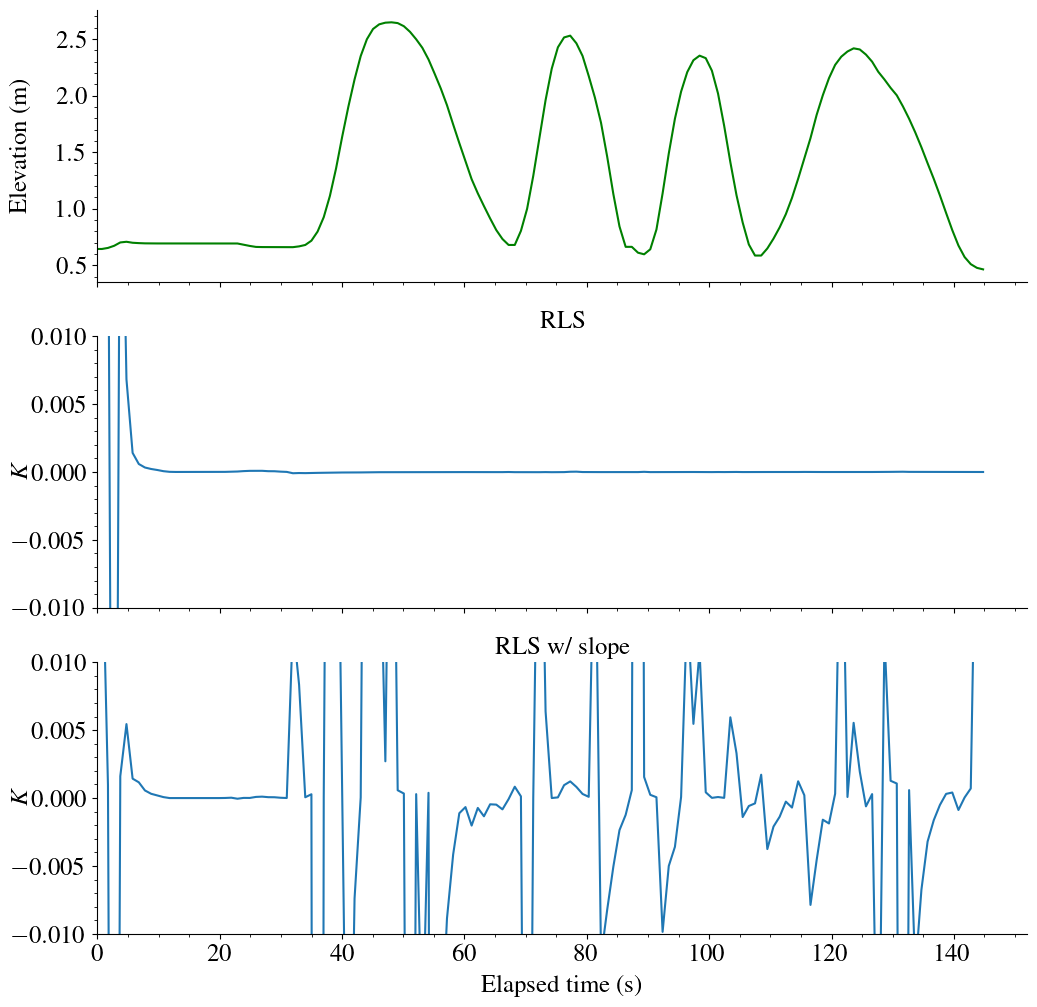

In [8]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=3, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(p2014_df.time_rel, p2014_df.Km_sym)
axs[1].set_ylabel("$K$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
axs[1].set_ylim(bottom=-0.01, top=0.01)
axs[1].set_title("RLS")

axs[2].plot(p2022_df.time_rel, p2022_df.Km_sym)
axs[2].set_ylabel("$K$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
axs[2].set_ylim(bottom=-0.01, top=0.01)
axs[2].set_title("RLS w/ slope")

axs[2].set_xlabel("Elapsed time (s)")
axs[2].xaxis.set_label_coords(0.5, -0.15)
axs[2].set_xlim(left=0)

for idx, ax in enumerate(axs):
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

# for ext in u.EXTS:
    # fig.savefig(figdir / f"warthog-hill-covariance.{ext}", bbox_inches="tight")


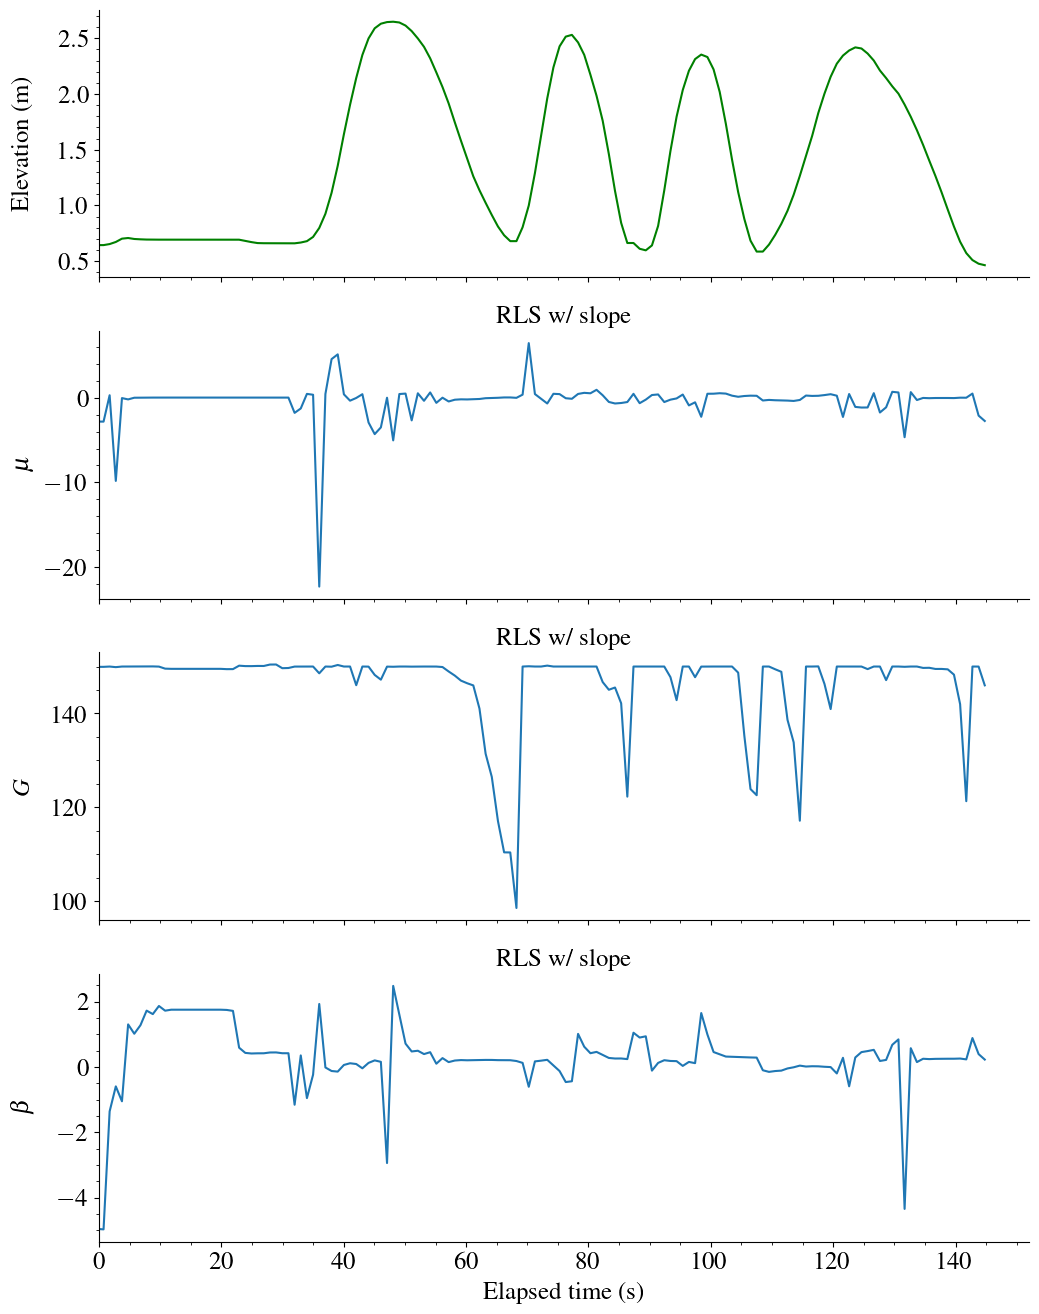

In [9]:
fig, axs = plt.subplots(figsize=(12, 16), nrows=4, sharex=True)

axs[0].plot(m2009_df.time_rel, m2009_df.pz, "g")
axs[0].set_ylabel("Elevation (m)")
axs[0].yaxis.set_label_coords(-0.07, 0.5)

axs[1].plot(p2022_df.time_rel, p2022_df.m_sym)
axs[1].set_ylabel("$\mu$")
axs[1].yaxis.set_label_coords(-0.07, 0.5)
# axs[1].set_ylim(bottom=-2.5, top=2.5)
axs[1].set_title("RLS w/ slope")

axs[2].plot(p2022_df.time_rel, p2022_df.G_sym)
axs[2].set_ylabel("$G$")
axs[2].yaxis.set_label_coords(-0.07, 0.5)
# axs[2].set_ylim(bottom=-2.5, top=2.5)
axs[2].set_title("RLS w/ slope")

axs[3].plot(p2022_df.time_rel, p2022_df.B_sym)
axs[3].set_ylabel("$\\beta$")
axs[3].yaxis.set_label_coords(-0.07, 0.5)
# axs[3].set_ylim(bottom=-2.5, top=2.5)
axs[3].set_title("RLS w/ slope")

axs[3].set_xlabel("Elapsed time (s)")
axs[3].xaxis.set_label_coords(0.5, -0.15)
axs[3].set_xlim(left=0)

for ax in axs:
    ax.spines[["right", "top"]].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())

# for ext in u.EXTS:
# fig.savefig(figdir / f"warthog.{ext}", bbox_inches="tight")
